# Titanic Classification Model

Ana Sy-Quia<br>

Winter 2024<br>

Code was originally used for Machine Learning I at the University of Chicago

In [710]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import os

In [711]:
# print(os.getcwd())
os.chdir('/Users/anasyquia/Downloads')

# Read in data
df = pd.read_csv('Assignment_3/Titanic_Survival/train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [712]:
df.shape

(891, 12)

In [713]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [714]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Handle missing values

### ***Embarked***

In [715]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

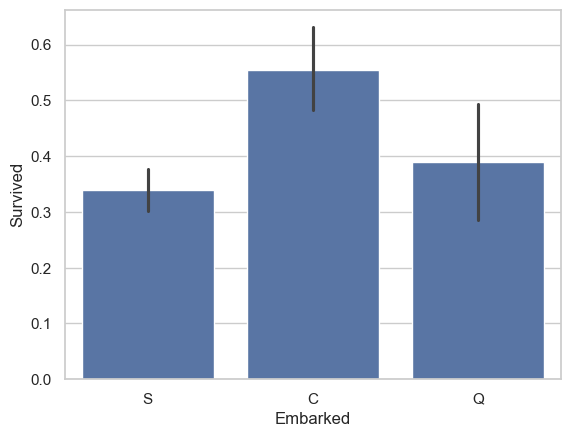

In [716]:
# Impute NAs with mode
df['Embarked'] = df['Embarked'].fillna('S')
sns.barplot(x="Embarked", y="Survived", data=df)
plt.show()

In [717]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df['Embarked'] = df['Embarked'].map(embarked_mapping)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1


### ***Age***

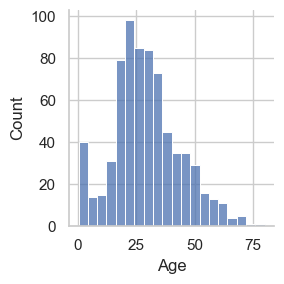

In [718]:
sns.displot(df[df['Age'].notnull()]['Age'], height=3, aspect=1)  
plt.show()

In [719]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [720]:
df['Age'] = df['Age'].interpolate()
# Interpolate missing values
df['Age'].describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

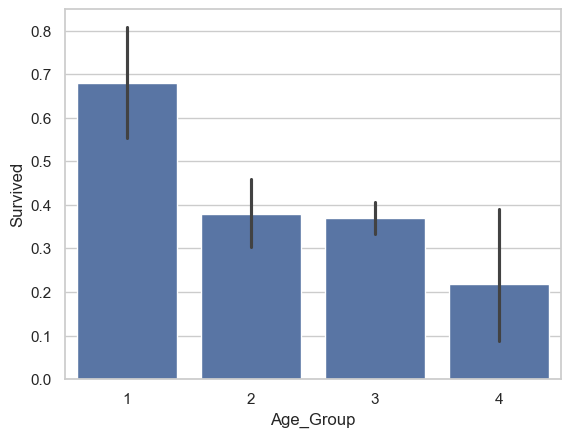

In [721]:
# Added age group bins
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 5, 19, 60, 80], labels=['1','2','3','4'])
df['Age_Group'] = df['Age_Group'].astype(int)

sns.barplot(x="Age_Group", y="Survived", data=df)
plt.show()


### ***Cabin***

In [722]:
df['Cabin'].head(15)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

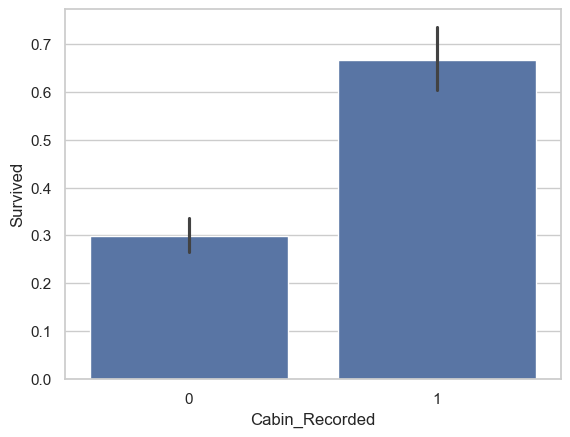

In [723]:
df['Cabin_Recorded'] = df['Cabin'].notnull().astype(int)

sns.barplot(x="Cabin_Recorded", y="Survived", data=df)
plt.show()

In [724]:
df = df.drop('Cabin', axis=1)

## Feature Engineering

### ***Sex***

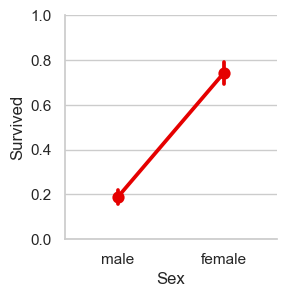

In [725]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=df, x_vars=['Sex'], y_vars='Survived', height=3, aspect=1)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))
plt.show()

In [726]:
df['is_female'] = df['Sex'].apply(lambda x: 1 if x == 'female' else 0)
df = df.drop('Sex', axis=1)

### ***Fare***

In [727]:
# Create Fare_Class by splitting Fare into 4 quartiles
df['Fare_Class'] = pd.qcut(df['Fare'], q=4, labels=['1', '2', '3', '4'])
df['Fare_Class'] = df['Fare_Class'].astype(int)

# Display the first few rows
print(df[['Fare', 'Fare_Class']].head())

# Check the value counts for each quartile
print("Fare_Class Distribution:\n", df['Fare_Class'].value_counts())

# Get quartile ranges
print("\nFare Quartiles:\n", df['Fare'].quantile([0, 0.25, 0.5, 0.75, 1]))

# Summary statistics to check distribution
print("\nSummary Statistics:\n", df['Fare'].describe())

      Fare  Fare_Class
0   7.2500           1
1  71.2833           4
2   7.9250           2
3  53.1000           4
4   8.0500           2
Fare_Class Distribution:
 Fare_Class
2    224
1    223
4    222
3    222
Name: count, dtype: int64

Fare Quartiles:
 0.00      0.0000
0.25      7.9104
0.50     14.4542
0.75     31.0000
1.00    512.3292
Name: Fare, dtype: float64

Summary Statistics:
 count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


Fare_Class
1    0.197309
2    0.303571
3    0.454955
4    0.581081
Name: Survived, dtype: float64


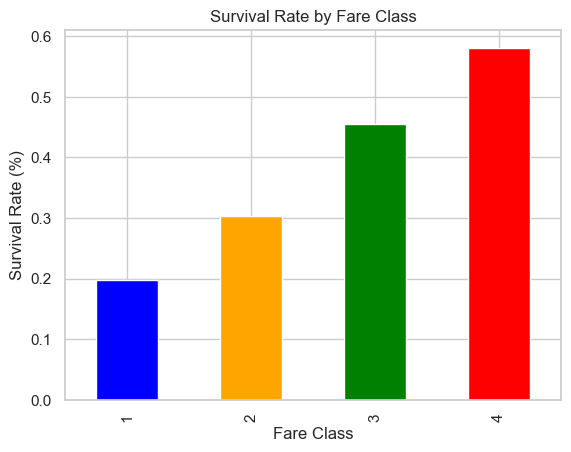

In [728]:
import matplotlib.pyplot as plt

# Calculate survival rate for each Fare_Class
survival_rates = df.groupby('Fare_Class')['Survived'].mean() # Convert to percentage

# Display survival rates
print(survival_rates)

# Plot the survival rate per Fare_Class
survival_rates.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.xlabel("Fare Class")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Fare Class")
plt.show()

### ***Title***

In [729]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group,Cabin_Recorded,is_female,Fare_Class
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,3,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.0,1,0,PC 17599,71.2833,2,3,1,1,4
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,3,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,3,1,1,4
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,3,0,0,2


In [730]:
# Extract titles after comma
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [731]:
df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [732]:
df['Title'].isnull().sum()

0

In [733]:
# Define title mapping
title_mapping = {
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Ms": "Miss",
    "Master": "Master",
    "Countess": "Royalty",
    "Lady": "Royalty",
    "Sir": "Royalty",
    "Jonkheer": "Royalty",
    "Capt": "Military",
    "Col": "Military",
    "Major": "Military",
    "Rev": "Clergy",
    "Dr": "Doctor",
    "Don": "Foreign",
    "Dona": "Foreign",
    "Mme": "Foreign",
    "Mlle": "Foreign"
}

df['Title'] = df['Title'].map(title_mapping).fillna("Foreign")

# Check new grouped titles
df['Title'].value_counts()


Title
Mr          517
Miss        183
Mrs         125
Master       40
Doctor        7
Clergy        6
Military      5
Foreign       4
Royalty       4
Name: count, dtype: int64

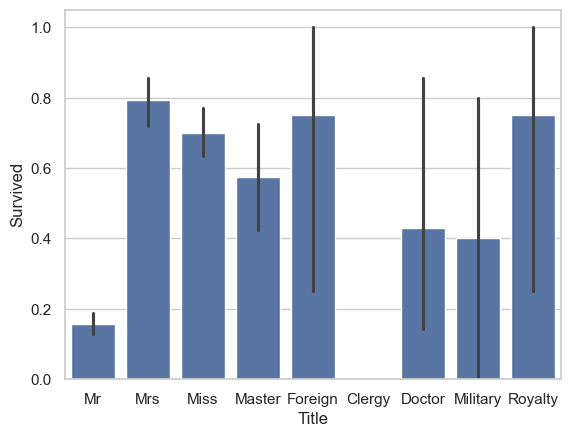

In [734]:
sns.barplot(x="Title", y="Survived", data=df)
plt.show()

In [735]:
# One-hot encode the 'Title' column
df = pd.get_dummies(df, columns=['Title'], prefix='Title')

In [736]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Age_Group', 'Cabin_Recorded',
       'is_female', 'Fare_Class', 'Title_Clergy', 'Title_Doctor',
       'Title_Foreign', 'Title_Master', 'Title_Military', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Royalty'],
      dtype='object')

In [737]:
df = df.drop(['Name', 'Ticket', 'Age', 'Fare'], axis=1)
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Age_Group,Cabin_Recorded,is_female,Fare_Class,Title_Clergy,Title_Doctor,Title_Foreign,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty
0,1,0,3,1,0,1,3,0,0,1,False,False,False,False,False,False,True,False,False
1,2,1,1,1,0,2,3,1,1,4,False,False,False,False,False,False,False,True,False
2,3,1,3,0,0,1,3,0,1,2,False,False,False,False,False,True,False,False,False
3,4,1,1,1,0,1,3,1,1,4,False,False,False,False,False,False,False,True,False
4,5,0,3,0,0,1,3,0,0,2,False,False,False,False,False,False,True,False,False


### ***Class and Gender Interaction Variable***

In [738]:
df['Male_3rd_Class'] = ((df['is_female'] == 0) & (df['Pclass'] == 3)).astype(int)

In [739]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   PassengerId     891 non-null    int64
 1   Survived        891 non-null    int64
 2   Pclass          891 non-null    int64
 3   SibSp           891 non-null    int64
 4   Parch           891 non-null    int64
 5   Embarked        891 non-null    int64
 6   Age_Group       891 non-null    int64
 7   Cabin_Recorded  891 non-null    int64
 8   is_female       891 non-null    int64
 9   Fare_Class      891 non-null    int64
 10  Title_Clergy    891 non-null    bool 
 11  Title_Doctor    891 non-null    bool 
 12  Title_Foreign   891 non-null    bool 
 13  Title_Master    891 non-null    bool 
 14  Title_Military  891 non-null    bool 
 15  Title_Miss      891 non-null    bool 
 16  Title_Mr        891 non-null    bool 
 17  Title_Mrs       891 non-null    bool 
 18  Title_Royalty   891 non-null  

In [740]:
X, y = df.drop(['Survived'], axis=1), df['Survived']

# Model Testing & Evaluation

In [741]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib

In [742]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y, random_state=42)

# Standardize features (important for SVM, Logistic Regression, SGD, etc.)
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [743]:
print(y.value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [744]:
# Initialize models
models_dict = {
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1),
    'Support Vector Machines': SVC(),
    'Linear SVC': LinearSVC(max_iter=10000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Stochastic Gradient Descent': SGDClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier()
}

# Train models and store accuracy scores
model_scores = []
trained_models = {}  # Dictionary to store trained models

for name, model in models_dict.items():
    model.fit(train_X_scaled, train_y)  # Train the model
    predictions = model.predict(test_X_scaled)  # Make predictions
    accuracy = accuracy_score(test_y, predictions)# Evaluate model
    precision = precision_score(test_y, predictions, average='binary')  # For binary classification
    f1 = f1_score(test_y, predictions, average='binary')
    # Store results
    model_scores.append({
        'Model': name,
        'Accuracy': round(accuracy * 100, 2),
        'Precision': round(precision * 100, 2),
        'F1-Score': round(f1 * 100, 2)
    })
    # Store trained model in dictionary
    trained_models[name] = model
    # Save each trained model
    # joblib.dump(model, f"{name.replace(' ', '_')}.pkl")

In [745]:
# Convert results to DataFrame and sort by Accuracy
models_df = pd.DataFrame(model_scores).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(models_df)

                          Model  Accuracy  Precision  F1-Score
0                    Linear SVC     82.51      79.01     76.65
1           Logistic Regression     82.06      79.49     75.61
2       Support Vector Machines     81.61      77.11     75.74
3                           KNN     81.17      78.21     74.39
4                 Random Forest     80.72      76.54     74.25
5   Stochastic Gradient Descent     79.37      73.81     72.94
6  Gradient Boosting Classifier     78.48      75.68     70.00
7                 Decision Tree     69.51      59.57     62.22


In [746]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[
    ('svc', trained_models['Linear SVC']),
    ('logreg', trained_models['Logistic Regression']),
], voting='hard')

ensemble.fit(train_X_scaled, train_y)

print("Ensemble Accuracy:", accuracy_score(test_y, ensemble.predict(test_X_scaled)))
print('Precision:', precision_score(test_y, ensemble.predict(test_X_scaled)))
print('F1-score:', f1_score(test_y, ensemble.predict(test_X_scaled)))

Ensemble Accuracy: 0.820627802690583
Precision: 0.7948717948717948
F1-score: 0.7560975609756098


In [747]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LinearSVC(max_iter=10000), param_grid, cv=5, scoring='accuracy')
grid.fit(train_X_scaled, train_y)
print("Best C:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best C: {'C': 1}
Best Accuracy: 0.8308495118392998


In [748]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Retrain the best model
best_svc = LinearSVC(C=1, max_iter=10000)
best_svc.fit(train_X_scaled, train_y)

# Make predictions
y_pred_best = best_svc.predict(test_X_scaled)

# Evaluate performance
accuracy = accuracy_score(test_y, y_pred_best)
precision = precision_score(test_y, y_pred_best)
f1 = f1_score(test_y, y_pred_best)

print(f"Final Model with C=1")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test F1-Score: {f1:.4f}")


Final Model with C=1
Test Accuracy: 0.8251
Test Precision: 0.7901
Test F1-Score: 0.7665


In [749]:
from sklearn.linear_model import LogisticRegression

best_log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=1000)
best_log_reg.fit(train_X_scaled, train_y)
y_pred_log_reg = best_log_reg.predict(test_X_scaled)

log_accuracy = accuracy_score(test_y, y_pred_log_reg)
log_precision = precision_score(test_y, y_pred_log_reg)
log_f1 = f1_score(test_y, y_pred_log_reg)

print(f"Logistic Regression with C=1")
print(f"Test Accuracy: {log_accuracy:.4f}")
print(f"Test Precision: {log_precision:.4f}")
print(f"Test F1-Score: {log_f1:.4f}")


Logistic Regression with C=1
Test Accuracy: 0.8206
Test Precision: 0.7949
Test F1-Score: 0.7561


In [765]:
# Load best model
best_model = best_svc

# Get predictions on training and test data
train_preds = best_model.predict(train_X_scaled)
test_preds = best_model.predict(test_X_scaled)

# Compute performance metrics
train_accuracy = accuracy_score(train_y, train_preds)
test_accuracy = accuracy_score(test_y, test_preds)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

train_precision = precision_score(train_y, train_preds, average='binary')
test_precision = precision_score(test_y, test_preds, average='binary')

train_f1 = f1_score(train_y, train_preds, average='binary')
test_f1 = f1_score(test_y, test_preds, average='binary')

print(f"Train Precision: {train_precision:.4f}, Test Precision: {test_precision:.4f}")
print(f"Train F1-Score: {train_f1:.4f}, Test F1-Score: {test_f1:.4f}")

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, train_X_scaled, train_y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Train Accuracy: 0.8368
Test Accuracy: 0.8251
Train Precision: 0.8182, Test Precision: 0.7901
Train F1-Score: 0.7762, Test F1-Score: 0.7665
Cross-validation accuracy: 0.8308 ± 0.0173


# Model application to test data

In [751]:
# Read in test data
dftest= pd.read_csv('Assignment_3/Titanic_Survival/holdout_test.csv')
dftest.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,NaN,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### ***Preprocessing***

In [752]:
print(dftest.isnull().sum())

Survived       418
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [753]:
# embarked_mapping = {"S": 1, "C": 2, "Q": 3} defined above
dftest['Embarked'] = dftest['Embarked'].map(embarked_mapping)

dftest['Age'] = dftest['Age'].interpolate()
dftest['Age_Group'] = pd.cut(dftest['Age'], bins=[0, 5, 19, 60, 80], labels=['1','2','3','4'])
dftest['Age_Group'] = dftest['Age_Group'].astype(int)

dftest['Cabin_Recorded'] = dftest['Cabin'].notnull().astype(int)
dftest = dftest.drop('Cabin', axis=1)

dftest['is_female'] = dftest['Sex'].apply(lambda x: 1 if x == 'female' else 0)
dftest = dftest.drop('Sex', axis=1)



In [754]:
dftest.iloc[152,]

Survived                         NaN
PassengerId                     1044
Pclass                             3
Name              Storey, Mr. Thomas
Age                             60.5
SibSp                              0
Parch                              0
Ticket                          3701
Fare                             NaN
Embarked                           1
Age_Group                          4
Cabin_Recorded                     0
is_female                          0
Name: 152, dtype: object

In [755]:
dftest['Fare'] = dftest['Fare'].interpolate()
dftest['Fare_Class'] = pd.qcut(dftest['Fare'], q=4, labels=['1', '2', '3', '4'])
dftest['Fare_Class'] = dftest['Fare_Class'].astype(int)


In [756]:
dftest['Title'] = dftest.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# title mapping defined above
dftest['Title'] = dftest['Title'].map(title_mapping).fillna("Foreign")

dftest = pd.get_dummies(dftest, columns=['Title'], prefix='Title')

dftest = dftest.drop(['Name', 'Ticket', 'Age', 'Fare'], axis=1)

dftest['Male_3rd_Class'] = ((dftest['is_female'] == 0) & (dftest['Pclass'] == 3)).astype(int)

In [757]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Embarked',
       'Age_Group', 'Cabin_Recorded', 'is_female', 'Fare_Class',
       'Title_Clergy', 'Title_Doctor', 'Title_Foreign', 'Title_Master',
       'Title_Military', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Royalty', 'Male_3rd_Class'],
      dtype='object')

In [758]:
dftest.columns

Index(['Survived', 'PassengerId', 'Pclass', 'SibSp', 'Parch', 'Embarked',
       'Age_Group', 'Cabin_Recorded', 'is_female', 'Fare_Class',
       'Title_Clergy', 'Title_Doctor', 'Title_Foreign', 'Title_Master',
       'Title_Military', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Male_3rd_Class'],
      dtype='object')

In [759]:
# Get the feature columns from training data (excluding the target variable)
train_columns = df.drop(columns=["Survived"]).columns  # Adjust if needed

# Find missing columns in test data
missing_cols = set(train_columns) - set(dftest.columns)

# Add missing columns with default value 0
for col in missing_cols:
    dftest[col] = 0

# Ensure the test set has the same column order as the training set
dftest = dftest[train_columns]


In [760]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   PassengerId     418 non-null    int64
 1   Pclass          418 non-null    int64
 2   SibSp           418 non-null    int64
 3   Parch           418 non-null    int64
 4   Embarked        418 non-null    int64
 5   Age_Group       418 non-null    int64
 6   Cabin_Recorded  418 non-null    int64
 7   is_female       418 non-null    int64
 8   Fare_Class      418 non-null    int64
 9   Title_Clergy    418 non-null    bool 
 10  Title_Doctor    418 non-null    bool 
 11  Title_Foreign   418 non-null    bool 
 12  Title_Master    418 non-null    bool 
 13  Title_Military  418 non-null    bool 
 14  Title_Miss      418 non-null    bool 
 15  Title_Mr        418 non-null    bool 
 16  Title_Mrs       418 non-null    bool 
 17  Title_Royalty   418 non-null    int64
 18  Male_3rd_Class  418 non-null  

In [761]:
# Scale test data & predict
dftest_scaled = scaler.fit_transform(dftest)
survived_predictions = best_model.predict(dftest_scaled)

In [762]:
test=pd.read_csv('Assignment_3/Titanic_Survival/holdout_test.csv')
predict = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": survived_predictions
    })

In [763]:
# Save predictions as .csv file
predict.to_csv('Titanic Results from anasyquia.csv', index=False)

<Axes: >

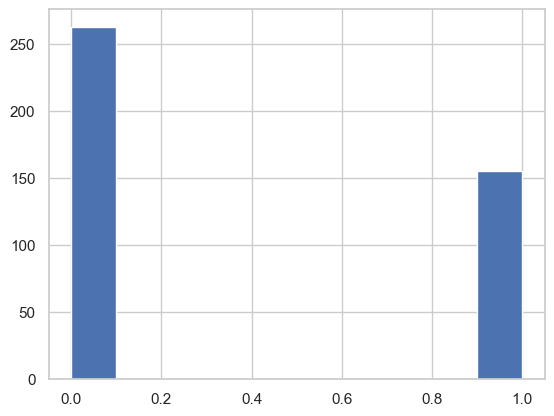

In [764]:
# Visualize predictions
predict['Survived'].hist()